##### Keeping track of what to do:
- x Created datasets
- x Isolate columns that need trimming/impute
- x Impute columns lacking values
- _ Perform correlation analysis
- _ Univariate Analysis
- _ Bivariate Analysis
- _ Feature Selection
- _ Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn #Correlation matrix visualiztion
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

##### Read datasets. View number of missing values in each column.

In [2]:
# kConf = pd.read_csv('data/kepExoConfirmed.csv')
eConf = pd.read_csv('data/exoConf.csv')
kCumu = pd.read_csv('data/kepExoCumulative.csv')
print('Confirmed dataset shape = '+str(eConf.shape))
print('Cumulative dataset shape = '+str(kCumu.shape))

eConf_missing = eConf.isna().sum()
kCumu_missing = kCumu.isna().sum()

print('Number of missing values in Confirmed Exoplanet dataset columns:')
print(eConf_missing)

print('Number of missing values in Cumulative dataset columns:')
print(kCumu_missing)

Confirmed dataset shape = (2320, 21)
Cumulative dataset shape = (9564, 20)
Number of missing values in Confirmed Exoplanet dataset columns:
tic_id            6
gaia_id           6
pl_orbper        48
pl_radj           0
pl_massj          0
pl_dens         617
pl_orbeccen     766
pl_eqt         1185
pl_trandep     1651
pl_trandur     1337
pl_ratdor      1076
pl_ratror      1183
st_teff         375
st_rad          125
st_mass          63
st_lum         1644
ra                0
dec               0
sy_pmra          19
sy_pmdec         19
sy_dist          46
dtype: int64
Number of missing values in Cumulative dataset columns:
kepid                 0
koi_disposition       0
koi_pdisposition      0
koi_period            0
koi_time0bk           0
koi_time0             0
koi_eccen           363
koi_impact          363
koi_duration          0
koi_depth           363
koi_ror             363
koi_prad            363
koi_teq             363
koi_steff           363
koi_slogg           363
koi_srad   

##### Columns with a large amount of missing values will be excluded. Columns with minimal missing values will be provided values.

In [3]:
# Excluding columns missing large quantities of entries from each data set
eConf = eConf.drop(['pl_eqt','pl_trandep','pl_trandur','pl_ratdor','pl_ratror','st_lum'], axis=1)

# MAY HAVE TO CHANGE IMPUTE METHOD
##### Impute remaining missing values for each dataset based off the respective column.

In [11]:
# Using simple mean of each target column to fill missing values. A more in-depth method would involve
# taking into account interaction between variables.
eConf = eConf.fillna(eConf.mean())
kCumu = kCumu.fillna(kCumu.mean())
display(eConf)
display(kCumu)

C:\Users\zepol\AppData\Local\Temp\ipykernel_12000\847858862.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eConf = eConf.fillna(eConf.mean())
C:\Users\zepol\AppData\Local\Temp\ipykernel_12000\847858862.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kCumu = kCumu.fillna(kCumu.mean())


,tic_id,gaia_id,pl_orbper,pl_radj,pl_massj,pl_dens,pl_orbeccen,st_teff,st_rad,st_mass,ra,dec,sy_pmra,sy_pmdec,sy_dist
0,TIC 48964101,Gaia DR2 6243841249531772800,180658.340991,1.664,8.00000,2.430733,0.084015,4060.000000,1.35000,0.850000,242.376234,-21.083140,-10.274300,-23.204300,139.135000
1,TIC 77111651,Gaia DR2 4963614887043956096,180658.340991,1.440,13.90000,2.430733,0.084015,3064.000000,0.28000,0.110000,34.842705,-39.423077,8.869215,-26.681548,411.709327
2,TIC 332064670,Gaia DR2 704967037090946688,0.737000,0.169,0.02435,6.250000,0.084015,5172.000000,0.95000,0.870000,133.146837,28.329815,-485.872000,-233.651000,12.585500
3,TIC 332064670,Gaia DR2 704967037090946688,180658.340991,0.171,0.02542,6.300000,0.084015,5250.000000,0.96000,0.900000,133.146837,28.329815,-485.872000,-233.651000,12.585500
4,TIC 332064670,Gaia DR2 704967037090946688,0.736539,0.170,0.02542,6.400000,0.084015,5250.000000,0.96000,0.900000,133.146837,28.329815,-485.872000,-233.651000,12.585500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,TIC 268403451,Gaia DR2 2303332931542914048,2.864142,1.373,0.70900,0.340000,0.038000,6250.000000,1.48000,1.410000,277.478075,85.233321,-15.354200,24.460800,234.149000
2316,TIC 270577175,Gaia DR2 4792774797545105664,180658.340991,1.500,20.00000,2.430733,0.084015,8038.680000,1.54000,1.950000,86.821234,-51.066148,2.492660,82.577000,19.744200
2317,TIC 270577175,Gaia DR2 4792774797545105664,180658.340991,1.650,7.00000,2.430733,0.084015,5543.938437,1.15682,1.022632,86.821234,-51.066148,2.492660,82.577000,19.744200
2318,TIC 261136679,Gaia DR2 4623036865373793408,6.268340,0.184,0.01422,2.820000,0.000000,5870.000000,1.10000,1.020000,84.299280,-80.464604,311.187000,1048.840000,18.270200


,kepid,koi_disposition,koi_pdisposition,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_prad,koi_teq,koi_steff,koi_slogg,koi_srad,koi_smass,ra,dec,koi_kepmag
0,10797460,CONFIRMED,CANDIDATE,9.488036,170.538750,2455003.539,0.0,0.146,2.95750,615.8,0.022344,2.26,793.0,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,CONFIRMED,CANDIDATE,54.418383,162.513840,2454995.514,0.0,0.586,4.50700,874.8,0.027954,2.83,443.0,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,CANDIDATE,CANDIDATE,19.899140,175.850252,2455008.850,0.0,0.969,1.78220,10829.0,0.154046,14.60,638.0,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
3,10848459,FALSE POSITIVE,FALSE POSITIVE,1.736952,170.307565,2455003.308,0.0,1.276,2.40641,8079.2,0.387394,33.46,1395.0,5805.0,4.564,0.791,0.836,285.53461,48.285210,15.597
4,10854555,CONFIRMED,CANDIDATE,2.525592,171.595550,2455004.596,0.0,0.701,1.65450,603.3,0.024064,2.75,1406.0,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,FALSE POSITIVE,FALSE POSITIVE,0.527699,131.705093,2454964.705,0.0,1.252,3.22210,1579.2,0.297633,29.35,2088.0,5638.0,4.529,0.903,1.005,297.18875,47.093819,14.082
9560,10128825,CANDIDATE,CANDIDATE,1.739849,133.001270,2454966.001,0.0,0.043,3.11400,48.5,0.006379,0.72,1608.0,6119.0,4.444,1.031,1.075,286.50937,47.163219,14.757
9561,10147276,FALSE POSITIVE,FALSE POSITIVE,0.681402,132.181750,2454965.182,0.0,0.147,0.86500,103.6,0.009444,1.07,2218.0,6173.0,4.447,1.041,1.104,294.16489,47.176281,15.385
9562,10155286,CANDIDATE,CANDIDATE,333.486169,153.615010,2454986.615,0.0,0.214,3.19900,639.1,0.022590,19.30,557.0,4989.0,2.992,7.824,2.190,296.76288,47.145142,10.998


### Correlation Analysis of each dataset.
- https://realpython.com/numpy-scipy-pandas-correlation-python/
- https://datatofish.com/correlation-matrix-pandas/

##### Using a correlation matrix, variables that have little correlation with the overrall dataset can be isolated and removed accordingly.

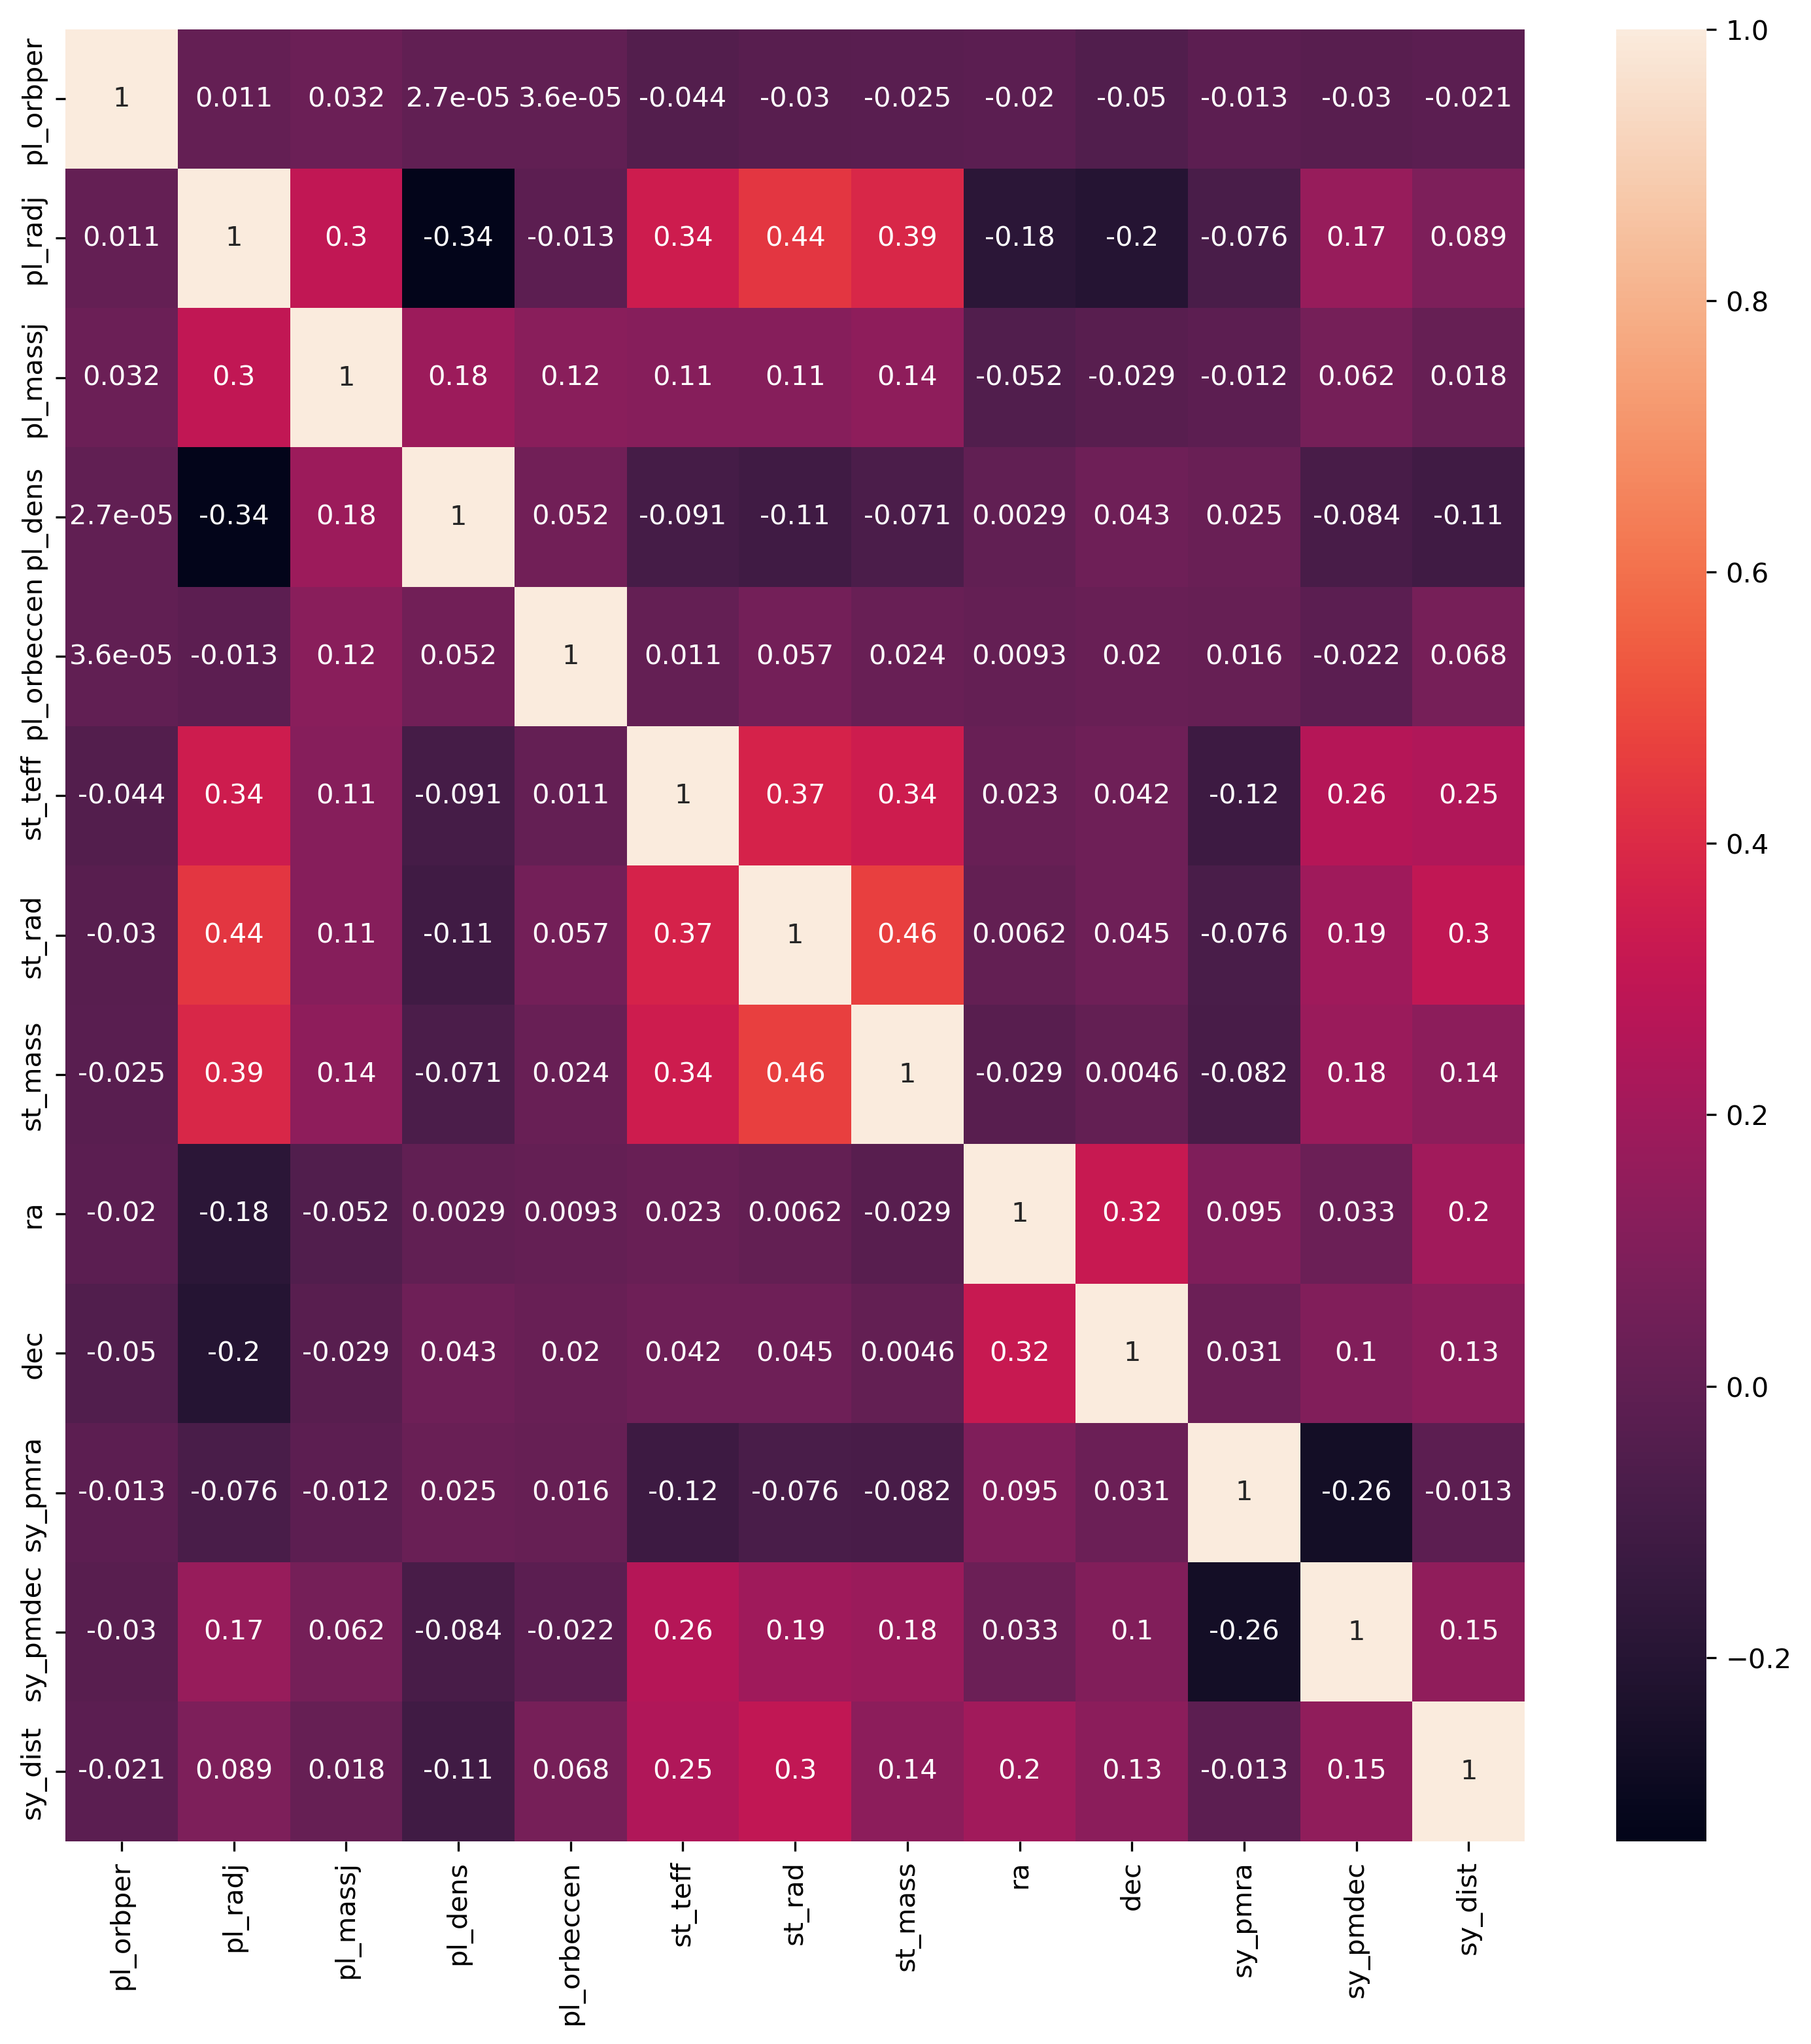

In [20]:
eConf_corr = eConf.corr()
# print(eConf_corr)
plt.figure(figsize = (12,12), dpi=300)
sn.heatmap(eConf_corr, annot=True)
plt.show()

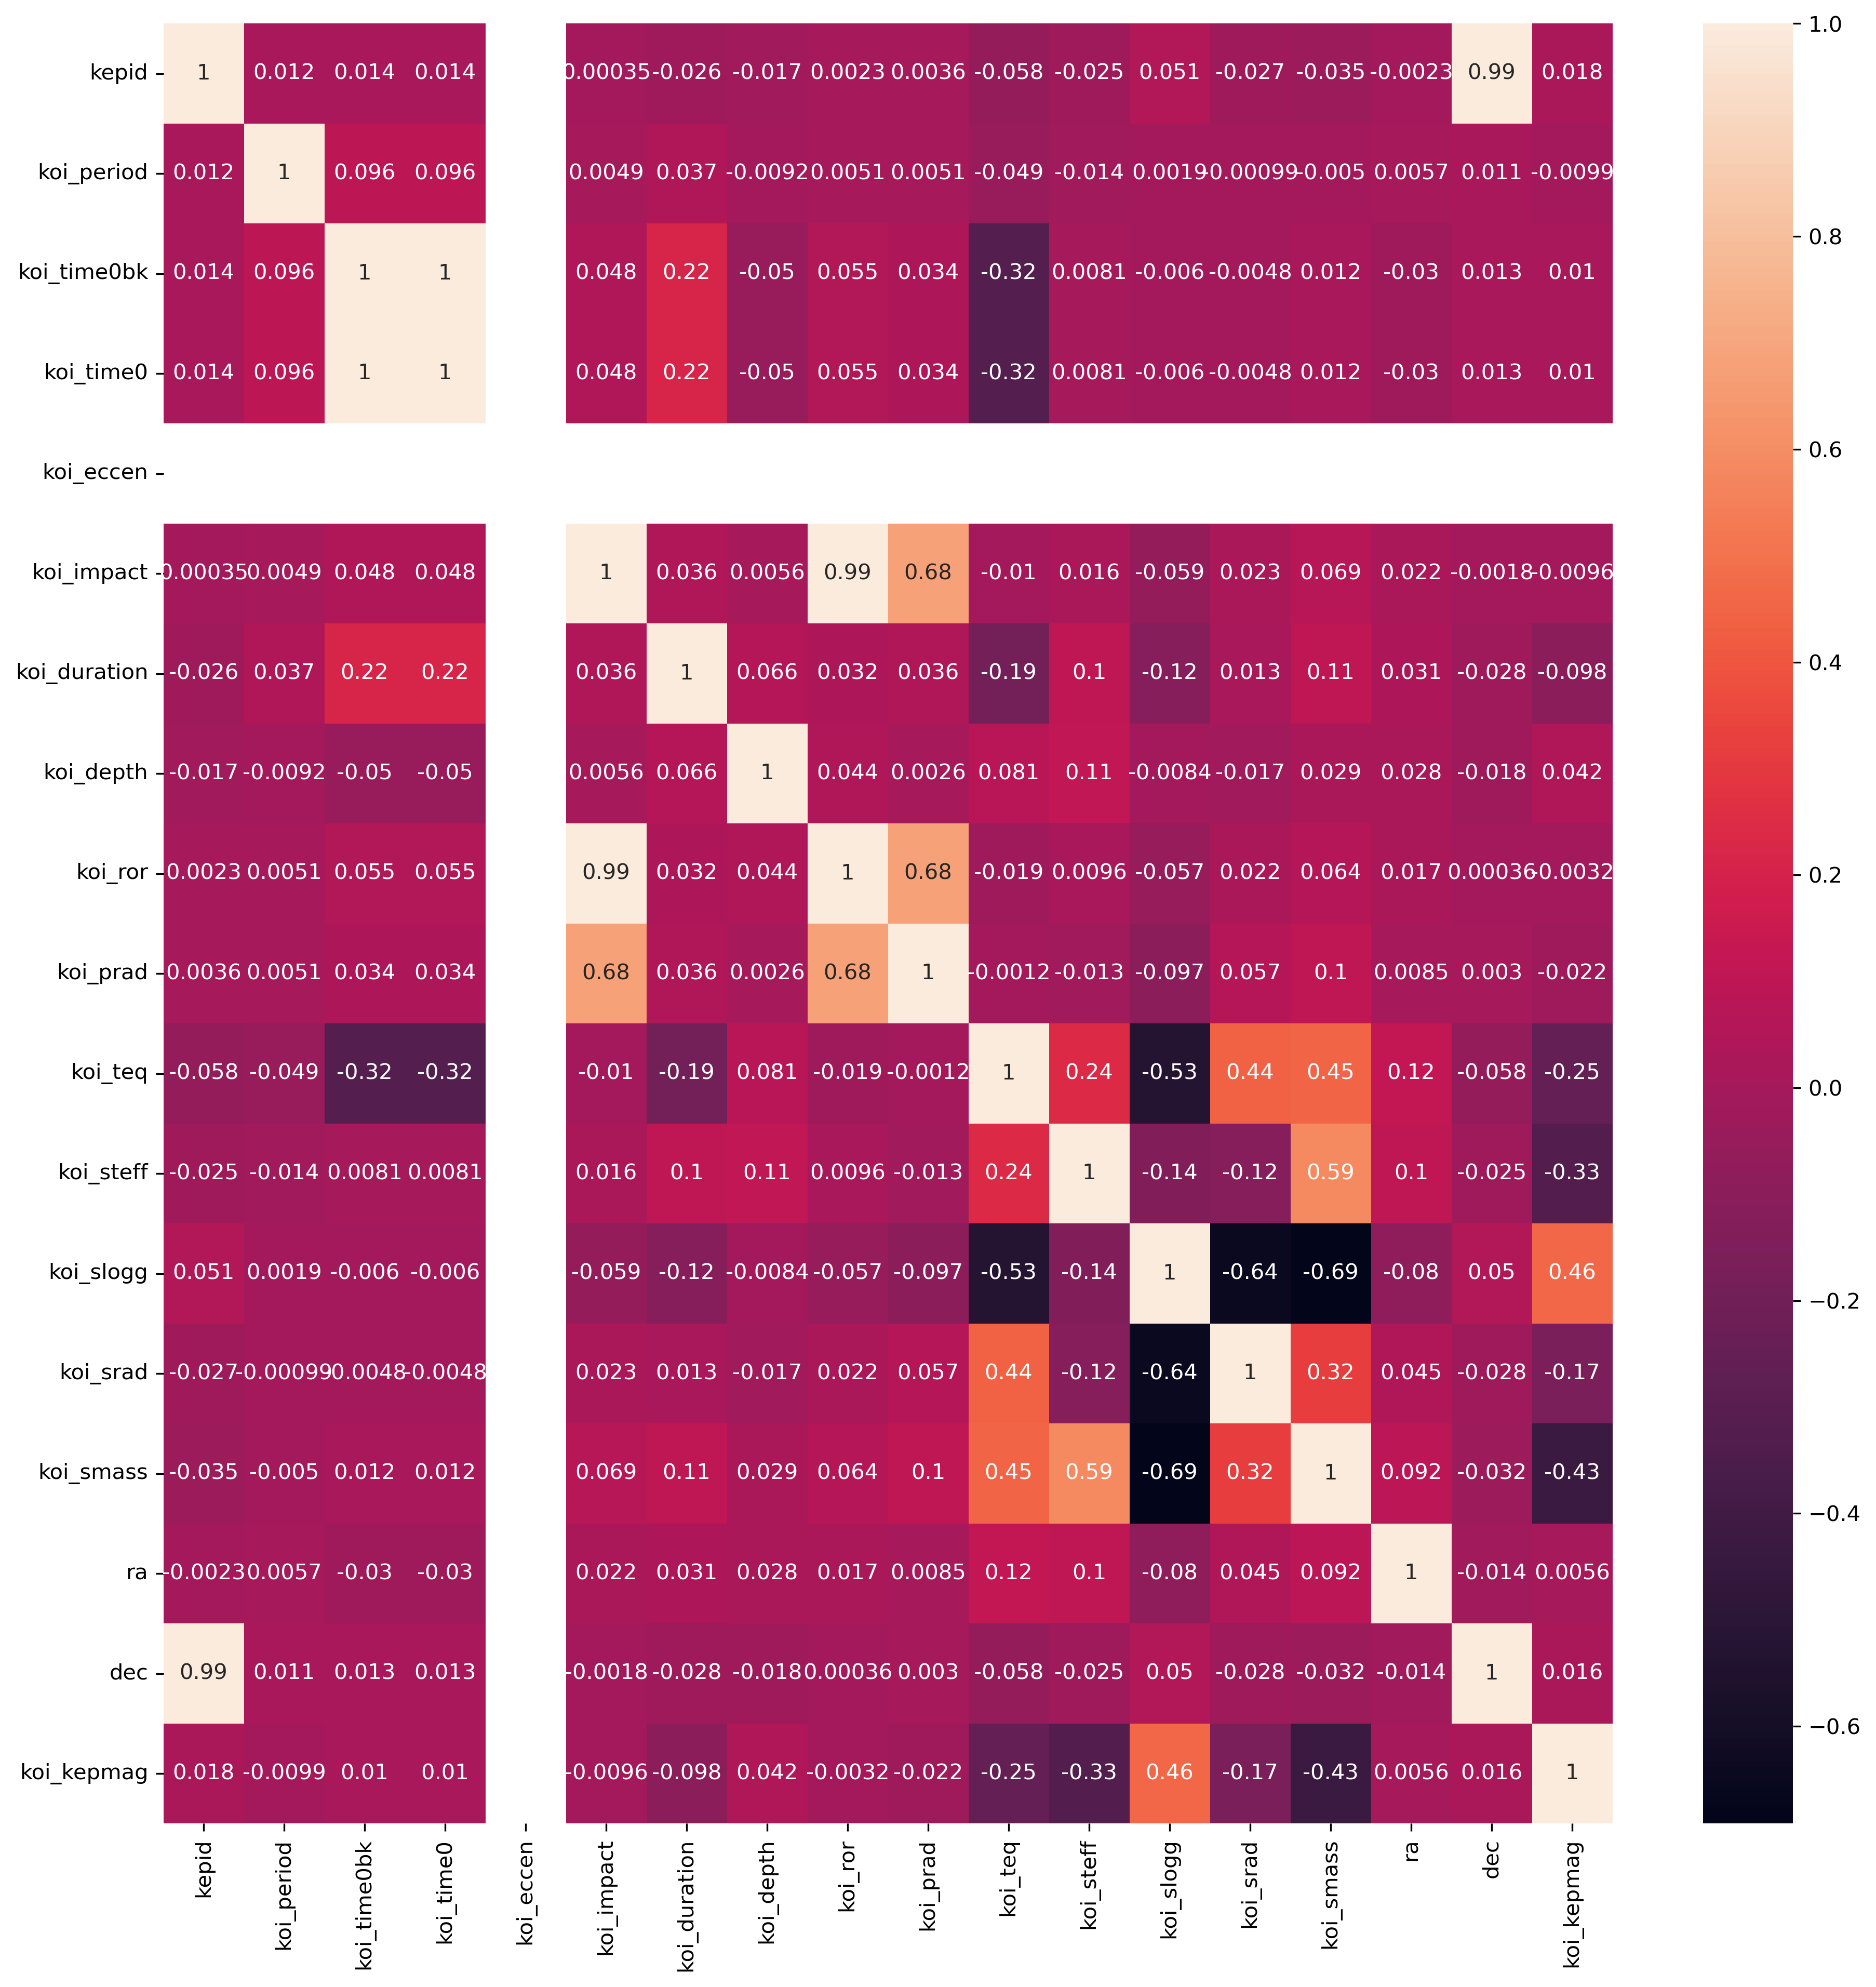

In [22]:
kCumu_corr = kCumu.corr()
# print(kCumu_corr)
plt.figure(figsize = (15,15), dpi=300)
sn.heatmap(kCumu_corr, annot=True)
plt.show()